In [38]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Radioactive Decay 

Nuclear decay is the phenomenon where an unstable atom loses energy by emitting a particle, often a photon, neutron, electron or alpha particle. 

Touch on random

Touch on statistical


## Half Life

The half life of an unstable atom, often denoted $\lambda$, is a constant that represents the amount of time on average it takes for a group of unstable atoms to have lost half of their population. To calculate the amount of an atom left over some time $t$ we use the following equation

\begin{equation}
N(t) = N_0 e^{-\lambda t}
\end{equation}

Where $N(t)$ is the _number_ of atoms you have at time $t$, $N_0$ is the original number of atoms you had at $t=0$ and $\lambda$ is the half life constant of the atom with units of inverse seconds.

\begin{equation}
\lambda = \frac{\ln(2)}{\tau_{1/2}}
\end{equation}
where $\tau_{1/2}$  is the half life in second.

The probability of not being decayed yet is 
\begin{equation}
p_{exist} = e^{-\lambda t}
\end{equation}

Meaning that the probability of decaying at a given time $t$ is

\begin{equation}
p_{decay} = 1 - p = 1 - e^{-\lambda t}
\end{equation}

Can simulate this process with python and random numbers. In pseudo code

```python

for instances in time:
    prob_decay = 1 - exp(-lambda * t)
    for atom in atoms:
        r = random_number()
        if prob_decay > random_number:
            atom.decays()
```
    


Touch on:

Each atom has different halflife

Random

Gather half-life constants of all atoms and put the plot on a slider so they can look at hella atoms

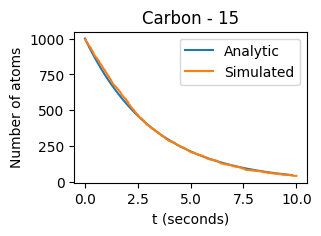

In [61]:
%matplotlib inline
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt 
import random

def HalfLifeEquation(N_0, lamb,t):
    return N_0 * 2.71828 ** (-lamb * t)

# Halflife of carbon-15 is 2.249 seconds

t = np.linspace(0,4*2.449,500)
plt.figure(figsize=(3, 2), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t, HalfLifeEquation(1000, np.log(2)/2.249, t), label="Analytic")
plt.ylabel("Number of atoms")
plt.xlabel("t (seconds)")
plt.title("Carbon - 15")


def Decay(N_0, lamb,max_time, steps=100):
    time_atom_pairs = []
    N = N_0
    time_step = max_time/steps
    t = 0

    for i in range(steps):
        
        # For each step in time, we need to check if each atom 
        # decays or not note we only calculate our probability
        # once because at a single instant in time, the probability
        # of decay is the same for each -- they are independent 
        # events. 
        
        # this is the equation we saw eariler 
        # TODO: GIVE THIS EQUATION EARLIER. 
        p = 1 - HalfLifeEquation(N, lamb, time_step)/N
        # Maybe explain the _ part? 
        for _ in range(N):
            
            # This is a 'random' number between 0 and 1
            # that we will use to compare to our decay probability
            r = random.uniform(0,1)
           
            # if our decay probability for the atom is greater, that 
            # atom decays. 
            if r < p:
                N = N -1
           
            # if we run out of atoms we should stop
            if N == 0:
                break
        
        # We have now moved forward in time once again!
        t = t + time_step
        # Store how many atoms at a given time t we have in 
        # an array. 
        time_atom_pairs.append([N, t])
        
    return time_atom_pairs

decays = Decay(1000, np.log(2)/2.249, 10, steps=500)



y,x = np.array(decays).T
#print(x)
#print(decays)
plt.plot(x,y, label = "Simulated")
plt.legend()
plt.show()
            
        
            
    
   


In [59]:
import pandas as pd
from ipywidgets import interactive
import time
from IPython import display
# Note you need lxml, and beautiful soup for the load html to work


# Steal some data from the National Institute of Standards
df = pd.read_html('https://www.nist.gov/pml/radionuclide-half-life-measurements-data')


def DecayRace(Element1, Element2, Scale_Time=1, AnimateDecay = False):
    
    N_0 = 1000
    
    index1 = np.where(df["Radionuclide"] == Element1)[0][0]
    HalfLife1 = df["HalfLife"].iloc[index1]
    index2 = index2 = np.where(df["Radionuclide"] == Element2)[0][0]
    HalfLife2 = df["HalfLife"].iloc[index2]
    
    multiplies = {'s':1., "min":60., "h":3600., "d":3600.*24.}
    
    half_life1, pm1, delta_time1, unit1 = HalfLife1.split()
    half_life2, pm2, delta_time2, unit2 = HalfLife2.split()
    
    multiplyer1 = multiplies[unit1]
    multiplyer2 = multiplies[unit2]
    
    multiplyer = max(multiplyer1, multiplyer2)
    time_length = max(half_life1, half_life2)
   
    my_title = "".join(["Half life of ",
                       Element1, 
                       ": ",
                       half_life1, 
                       " ",
                       unit1, 
                       "\n", 
                       "Half life of ", 
                       Element2, 
                       ": " , 
                       half_life2,
                       " ",
                       unit2])
    
    t = np.linspace(0, Scale_Time * float(time_length) * multiplyer, 5000)
    plt.figure(dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(t, 
             HalfLifeEquation(N_0, 
                              np.log(2)/(float(half_life1) * multiplyer),
                              t), 
             label=Element1)
    
    plt.plot(t, 
             HalfLifeEquation(N_0,
                              np.log(2)/(float(half_life2) * multiplyer), 
                              t), 
             label=Element2)
    
    plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
    
    plt.xlabel("Time in seconds")
    plt.ylabel("Number of Atoms")
    plt.title(my_title)
    plt.legend()
    plt.show()
    display.clear_output(wait=True)
    
    if AnimateDecay == True:
        
        # plt.close()
        
        Points1 = Decay(N_0, np.log(2)/(float(half_life1) * multiplyer), 
                  max_time= Scale_Time * float(time_length) * multiplyer, 
                  steps=50)
      
        Points2 = Decay(N_0, np.log(2)/(float(half_life2) * multiplyer), 
                  max_time= Scale_Time * float(time_length) * multiplyer, 
                  steps=50)
        
        y1,x1 = np.array(Points1).T
        y2,x2 = np.array(Points2).T
        
        label1 = " ".join(["Simulated decay:", Element1])
        label2 = " ".join(["Simulated decay:", Element2])
        
        for i in range(1, len(x1)):
            plt.figure(dpi= 100, facecolor='w', edgecolor='k') 
            plt.plot(t,
                     HalfLifeEquation(N_0, 
                                      np.log(2)/(float(half_life1) * multiplyer),
                                      t), 
                     label= Element1)
          
            plt.plot(t,
                     HalfLifeEquation(N_0, 
                                      np.log(2)/(float(half_life2) * multiplyer), 
                                      t), 
                     label= Element2) 
            
            plt.plot(x1[0:i], y1[0:i], label=label1)
            plt.plot(x2[0:i], y2[0:i], label=label2)
            plt.xlabel("Time in seconds")
            plt.ylabel("Number of Atoms")
            plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            plt.title(my_title)
            plt.legend()
            plt.show()
            # display.display(plt.gcf())
            display.clear_output(wait=True)
            # print(i)
            if i == len(x1):
                break
       
        plt.figure(dpi= 100, facecolor='w', edgecolor='k')
        plt.plot(t, 
                 HalfLifeEquation(N_0,
                                  np.log(2)/(float(half_life1) * multiplyer), 
                                  t),
                 label="Expectation")
       
        plt.plot(t, 
                 HalfLifeEquation(N_0, np.log(2)/(float(half_life2) * multiplyer), 
                                  t), 
                 label="Expectation")
        
        plt.plot(x1, y1, label=label1)
        plt.plot(x2, y2, label=label2)
        plt.xlabel("Time in seconds")
        plt.ylabel("Number of Atoms")
        plt.ticklabel_format(style='sci', axis='x', scilimits=(1,4))
        plt.title(my_title)
        plt.legend()
        plt.show()
 
        
    
df = df[0]   
# Rename our columns to something more managable
df.columns = ["Radionuclide", 
              "NumberOfSources", 
              "HalfLifes_Followed", 
              "HalfLife", 
              "StandardUncertainty", 
              "OtherUncertainty", 
              "ref"]

interactive_plot = interactive(DecayRace, Element1=df["Radionuclide"], Element2 = df["Radionuclide"],continuous_update=False)
interactive_plot


interactive(children=(Dropdown(description='Element1', options=('3H', '18F', '22Na', '24Na', '32P', '44Ti', '46Sc', '51Cr', '54Mn', '57Co', '58Co', '59Fe', '60Co', '62Cu', '65Zn', '67Ga', '75Se', '85Kr', '85Sr', '88Y', '99Mo', '99mTc', '99mTc', '103Ru', '109Cd', '110mAg', '111In', '113Sn', '117mSn', '123I', '125I', '125Sb', '127Xe', '131I', '131mXe', '133Ba', '133Xe', '134Cs', '137Cs', '139Ce', '140Ba', '140La', '141Ce', '144Ce', '152Eu', '153Gd', '153Sm', '154Eu', '155Eu', '166Ho', '169Yb', '177Lu', '181W', '186Re', '188Re', '188W', '192Ir', '195Au', '198Au', '201Tl', '202Tl', '203Hg', '203Pb', '207Bi', '228Th'), value='3H'), Dropdown(description='Element2', options=('3H', '18F', '22Na', '24Na', '32P', '44Ti', '46Sc', '51Cr', '54Mn', '57Co', '58Co', '59Fe', '60Co', '62Cu', '65Zn', '67Ga', '75Se', '85Kr', '85Sr', '88Y', '99Mo', '99mTc', '99mTc', '103Ru', '109Cd', '110mAg', '111In', '113Sn', '117mSn', '123I', '125I', '125Sb', '127Xe', '131I', '131mXe', '133Ba', '133Xe', '134Cs', '137Cs', '139Ce', '140Ba', '140La', '141Ce', '144Ce', '152Eu', '153Gd', '153Sm', '154Eu', '155Eu', '166Ho', '169Yb', '177Lu', '181W', '186Re', '188Re', '188W', '192Ir', '195Au', '198Au', '201Tl', '202Tl', '203Hg', '203Pb', '207Bi', '228Th'), value='3H'), IntSlider(value=1, description='Scale_Time', max=3, min=-1), Checkbox(value=False, description='AnimateDecay'), Output()), _dom_classes=('widget-interact',))

MC Simulation of radioactive decay for fun

Fusion/fission simplified example?